# UTS

## 1. KNN

Import pandas dan numpy

In [65]:
import pandas as pd
import numpy as np

memasukkan data csv

In [70]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


melihat tipe data yang akan digunakan

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


menentukkan variable-variabel independennya yaitu age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, dan MCP.1. Oleh karena itu variable Classification dikeluarkan.

In [72]:
x = data.drop(["Classification"], axis = 1)
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


menentukkan variable dependennya yaitu Classification.

In [73]:
y = data["Classification"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

 mengimport package model selection dari SKlearn

In [74]:
from sklearn.model_selection import train_test_split

membagi data training dan data testing. Data training digunakan oleh algoritma klasifikasi. Memisahkan data menjadi training dan testing set dimaksudkan agar model yang diperoleh nantinya memiliki kemampuan generalisasi yang baik dalam melakukan klasifikasi data.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

Mengaktifkan package StandardScaler dari SKlearn dan menuliskan syntax untuk mengubah skala data.

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

mengaktifkan package untuk klasifikasi KNN dengan mengimport package KNeighbors dari SKlearn

In [77]:
from sklearn.neighbors import KNeighborsClassifier

mengaktifkan fungsi klasifikasi untuk KNN

In [78]:
knn = KNeighborsClassifier (n_neighbors=4)

memasukkan data training pada fungsi klasifikasi untuk KNN

In [79]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

selanjutnya yaitu kita menentukkan prediksi atau peramalannya

In [80]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1])

menentukkan probabilitas dari prediksi

In [81]:
knn.predict_proba(x_test)

array([[0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.75, 0.25]])

import package untuk melihat keakuratan data hasil prediksi dengan data aktualnya

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

menampilakan matriks hasil prediksinya

In [83]:
print(confusion_matrix(y_test, y_pred))

[[9 4]
 [4 7]]


In [84]:
print("Score data train  :", knn.score(x_train, y_train))
print("Score data test   :", knn.score(x_test, y_test))

Score data train  : 0.8152173913043478
Score data test   : 0.6666666666666666


Dengan menggunakan KNN didapati score data training 0,8 dan score data test 0.66

mengukur ketepatan atau keakuratan hasil prediksi

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.69      0.69        13
           2       0.64      0.64      0.64        11

    accuracy                           0.67        24
   macro avg       0.66      0.66      0.66        24
weighted avg       0.67      0.67      0.67        24



didapatkan nilai precision sebesar 0,76 yang artinya nilai keakuratan hasil prediksi yaitu sebesar 76%.

## 2. Decision Tree

buat klasifikasi Decision Tree dan import library yang diperlukan

In [86]:
# import library
from sklearn import tree
from matplotlib import pyplot as plt

# membuat klasifikasi Decision Tree
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(x_train, y_train)

buat desain dari Decision Tree

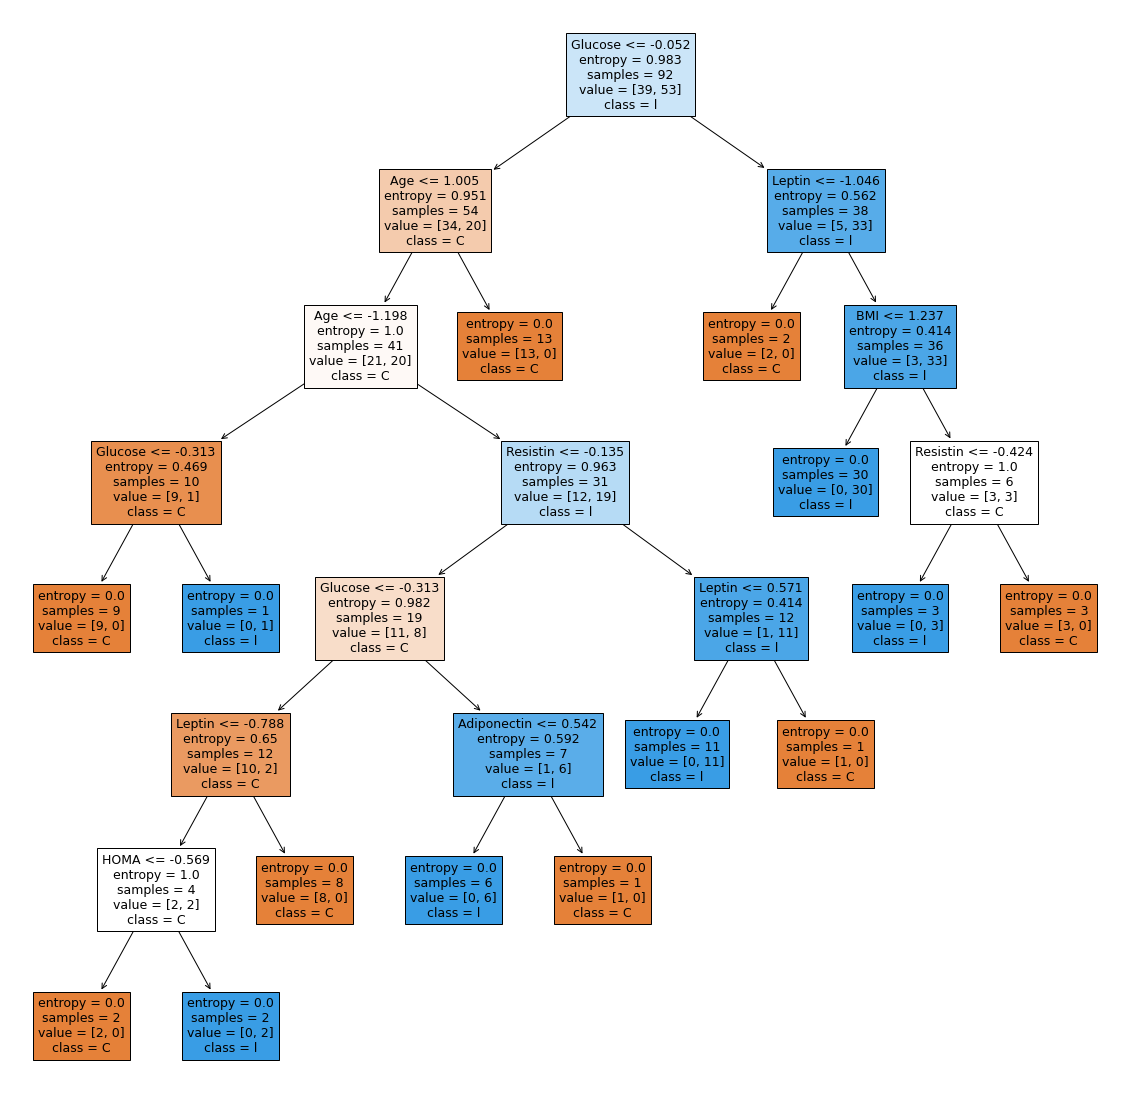

In [87]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9] ,filled=True)

Menghitung akurasi dari model Decision Tree

In [88]:
print("Score data train :", clf_tree.score(x_train, y_train))
print("Score data test  :", clf_tree.score(x_test, y_test))

Score data train : 1.0
Score data test  : 0.625


Dengan menggunakan decision tree didapati score data training bertambah menjadi 1 dan score data test menurun menjadi 0,625